# Projet PI² Mooveo - Vincent DEBANDE, Clément LAJOUX, Ludovic CHEVALLIER, Simon PONGAN

## Clusterisation d'une base de données 

<br>
Dans le cadre de notre projet PI² avec Mooveo (Startup de gestion de talents), une base de données contenant des Jobs et des Skills nous ont été fournis.  
Nous devons réaliser un clustering des skills. 



## Compréhension de la base de données

Dans un premier temps nous avons analyser la base de données pour voir de quoi elle était constituée.  
**Un job a une liste de 20 skills.** 

Il y a 349 jobs pour 960 skills.

Nous avons donc mis sous forme de DataFrame ces données. En ligne un skill, en colonnes les jobs. 
Si un skill apparaît dans un job, la modalité est à **TRUE**, **FALSE** sinon.

Le but étant d'appliquer un Hierarchical Clusstering Algorithm sur nos données.

In [1]:
import pandas as pd

matrixSkillsJobs = pd.read_csv("BDD/matrixSkillsJob.csv", encoding="UTF-8")
matrixSkillsJobs

Skills  Responsable des télécommunications  \
0                        Microsoft                                True   
1                       Sauvegarde                                True   
2                   Virtualisation                                True   
3                             UNIX                                True   
4                          OpenVPN                                True   
..                             ...                                 ...   
955       Mises à jour du logiciel                               False   
956                Modélisation 3D                               False   
957    Optimisation opérationnelle                               False   
958  Organisations d'apprentissage                               False   
959              Design de produit                               False   

     Chef de projets  Gérant de portefeuille  Gestionnaire middle-office  \
0              False                   False                       False   
1              False                   False                       False   
2              False                   False                       False   
3              False                   False                       False   
4              False                   False                       False   
..               ...                     ...                         ...   
955            False                   False                       False   
956            False                   False                       False   
957            False                   False                       False   
958            False                   False                       False   
959            False                   False                       False   

     Directeur général adjoint en charge de la stratégie  \
0                                                False     
1                                                False     
2                                                False     
3                                                False     
4                                                False     
..                                                 ...     
955                                              False     
956                                              False     
957                                              False     
958                                              False     
959                                              False     

     Directeur de développement de produit  Community manager  Manager  \
0                                    False              False    False   
1                                    False              False    False   
2                                    False              False    False   
3                                    False              False    False   
4                                    False              False    False   
..                                     ...                ...      ...   
955                                  False              False    False   
956                                  False              False    False   
957                                  False              False    False   
958                                  False              False    False   
959                                  False              False    False   

     Conseiller crédits  ...  Administrateur de base de données  \
0                 False  ...                              False   
1                 False  ...                              False   
2                 False  ...                              False   
3                 False  ...                              False   
4                 False  ...                              False   
..                  ...  ...                                ...   
955               False  ...                              False   
956               False  ...                              False   
957          

Pour savoir si deux variables sont liées ou non, il faut pouvoir calculer une distance entre elles. 
Puisque nous avons des variables qualitative, nous avons utiliser non pas la distance Euclidienne, mais la **Dice Distance**.

### Dice Distance

Elle varie entre 0 et 1 :

* 0 : Les individus sont identiques (la diagonale sera donc à 0) 
* 1 : Les individus sont totalement différents

#### Comment la calculer ? 

<img src="./Images/DiceDistance.png">


Avec d'autres mots : 

Pour deux individus, c'est le nombre de colonnes qui **n'ont pas la même valeur** / ((2 * le nombre de colonnes qui sont à **TRUE** pour les deux) + le nombre de colonnes qui n'ont pas la **même valeur**


In [2]:
distanceMatrix = pd.read_csv("BDD/distanceMatrix.csv", encoding="UTF-8")
distanceMatrix

Unnamed: 0  Microsoft  Sauvegarde  Virtualisation  \
0                        Microsoft   0.000000    0.000000        0.047619   
1                       Sauvegarde   0.000000    0.000000        0.047619   
2                   Virtualisation   0.047619    0.047619        0.000000   
3                             UNIX   0.047619    0.047619        0.090909   
4                          OpenVPN   0.000000    0.000000        0.047619   
..                             ...        ...         ...             ...   
955       Mises à jour du logiciel   1.000000    1.000000        1.000000   
956                Modélisation 3D   1.000000    1.000000        1.000000   
957    Optimisation opérationnelle   1.000000    1.000000        1.000000   
958  Organisations d'apprentissage   1.000000    1.000000        1.000000   
959              Design de produit   1.000000    1.000000        1.000000   

         UNIX   OpenVPN  Maintenance des systèmes  Gestion des applications  \
0    0.047619  0.000000                  0.000000                  0.000000   
1    0.047619  0.000000                  0.000000                  0.000000   
2    0.090909  0.047619                  0.047619                  0.047619   
3    0.000000  0.047619                  0.047619                  0.047619   
4    0.047619  0.000000                  0.000000                  0.000000   
..        ...       ...                       ...                       ...   
955  1.000000  1.000000                  1.000000                  1.000000   
956  1.000000  1.000000                  1.000000                  1.000000   
957  1.000000  1.000000                  1.000000                  1.000000   
958  1.000000  1.000000                  1.000000                  1.000000   
959  1.000000  1.000000                  1.000000                  1.000000   

     Antivirus  Anti-Spam  ...  Out-of-the-box Thinking  Analyse commerciale  \
0     0.000000   0.000000  ...                      1.0                  1.0   
1     0.000000   0.000000  ...                      1.0                  1.0   
2     0.047619   0.047619  ...                      1.0                  1.0   
3     0.047619   0.047619  ...                      1.0                  1.0   
4     0.000000   0.000000  ...                      1.0                  1.0   
..         ...        ...  ...                      ...                  ...   
955   1.000000   1.000000  ...                      1.0                  1.0   
956   1.000000   1.000000  ...                      1.0                  1.0   
957   1.000000   1.000000  ...                      1.0                  1.0   
958   1.000000   1.000000  ...                      1.0                  1.0   
959   1.000000   1.000000  ...                      1.0                  1.0   

     Service axé sur la clientèle  Déploiement commercial  Mise en page  \
0                             1.0                     1.0           1.0   
1                             1.0                     1.0           1.0   
2                             1.0                     1.0           1.0   
3                             1.0                     1.0           1.0   
4                             1.0                     1.0           1.0   
..                            ...                     ...           ...   
955                           1.0                     1.0           0.0   
956                           1.0                     1.0           0.0   
957                           1.0                     1.0           0.0   
958                           1.0                     1.0           0.0   
959                           1.0                     1.0           0.0   

     Mises à jour du logiciel  Modélisation 3D  Optimisation opérationnelle  \
0                         1.0              1.0                          1.0   
1                         1.0              1.0                          1.0   
2                         1.0              1.0     

### Heat map

Pour mieux visualiser cette matrice, nous l'avons affiché sous forme de Heatmap

<img src = "Images/Mooveo/heatmap.png">

Comme nous pouvons le voir, il n'y a pas beaucoup de lien entre les skills, sauf autour de la diagonale. 
Cela est normal, car nous avons récupéré les skills de la manière suivante (le tout était stocké dans un .json) : 

* Pour chaque job, nous lisons la liste des skills et les ajoutons dans une la liste de skills s'ils ne sont pas déjà présent

Donc les rectangles blanc autour de la diagonale sont des skills présent dans le même job.

### Dendograms

Ensuite, pour visualiser les liens entre chaque skills, nous avons voulu générer un dendogram en utilisant la méthode de linkage **Average**

<img src = "Images/Mooveo/dendoAverage.png">

### Interprétations 

Nous avons interprété le Heat map et le dendogram de la manière suivante : 

* Sur le Heatmap, nous ne pouvons pas voir de liens évidents entre les skills 
* Sur le Dendogram non plus. La pluspart des regroupements se font très haut dans l'arbre, il n'y a pas de grands groupes qui se forment. 

### Explications et solutions testées

Nous avons essayé de comprendre **pourquoi** il n'y avait pas de liens entre les skills. 

Après analyse de la base de données, nous avons remarqué que 320 skills (exactement 1/3 des skills) n'apparraissaient que 1 seule fois dans un job. Ainsi, nous en avons déduis qu'1/3 des skills n'étaient pas exploitable pour notre problème.

En effet, pour calculer la distance entre les skills nous nous basons sur l'apparition de ceux-ci dans un même job.

Nous avons donc appliqué un filtre pour garder les skills apparraissant entre 2 et 100 fois (en effet, certains skills apparraissaient dans tous les jobs). 

### Heat map & dendogramme pour apparition > 1

En recalculant notre Heatmap, nous avons obtenu : 

<img src = "Images/Mooveo/HeatMapMooveo2app.png">

On peut voir qu'il y a un peu plus de liens entre les skills.

<img src = "Images/Mooveo/newDendoAvg.png">

Les groupes se font un peu plus tôt, l'arbre est plus aéré. 

### Dendogramme pour apparition > 2 puis > 3

<img src = "Images/Mooveo/newDendoAvg2.png">

<img src = "Images/Mooveo/newDendoAvg3.png">

On voit alors qu'il y a beaucoup plus de liens tôt (la distance entre les sous groupes est de plus en plus faible et la formation d'un grand groupe est de plus en plus cohérente). 

# Questions 

* Notre approche est-elle correcte ? (Si non, avez-vous des pistes pour réaliser le clustering d'une autre manière ?)
* Êtes-vous d'accord avec nos interprétations ? 
* Qu'elles seraient les pistes à envisager pour obtenir plus de liens et pouvoir faire le clustering ? 

# Scrapping pour utiliser la même méthode sur une base de données différente

Nous avons voulu voir ce que pouvais donner notre approche sur une autre base de données. 
Ainsi, nous avons fait du scrapping sur le site de Pôle Emploi : 

Pour chaque job dans la base de données, nous avons recherché des skills. 

**Attention** : Certains jobs ne sont pas assez précis ("Chef de projets" par exemple) et ressortent sur + 20 fiches métiers sur des domaines en tout genre. Nous avons retiré ceux que nous avons repéré, mais il se peut qu'il en reste. Aussi, nous n'avons pas vérifié la cohérence des skills sur un métier recherché, il se peut que des skills n'aient en réalité, rien à voir avec un job.

Sur les 349 skills dans la base de données, 148 ont été trouvés sur Pôle Emploi.

In [3]:
newSkills = pd.read_csv("BDD/newMatrixSkillsJobsAddSkills.csv", encoding = "UTF-8")
newSkills

Unnamed: 0  Gérant de portefeuille  \
0                                 Droit immobilier                     1.0   
1            Comptabilité des opérations de marché                     1.0   
2                                Gestion de projet                     1.0   
3                          Contrats de maintenance                     1.0   
4                             Veille réglementaire                     1.0   
...                                            ...                     ...   
1652  Techniques de micro filmage, de numérisation                     0.0   
1653                              Lecture publique                     0.0   
1654                          Littérature jeunesse                     0.0   
1655                    Types de supports de films                     0.0   
1656             Sciences religieuses et théologie                     0.0   

      Gestionnaire middle-office  Community manager  \
0                            0.0                0.0   
1                            0.0                0.0   
2                            0.0                0.0   
3                            0.0                0.0   
4                            0.0                0.0   
...                          ...                ...   
1652                         0.0                0.0   
1653                         0.0                0.0   
1654                         0.0                0.0   
1655                         0.0                0.0   
1656                         0.0                0.0   

      Responsable des relations publiques  Gérant de magasin  Fiscaliste  \
0                                     0.0                0.0         0.0   
1                                     0.0                0.0         0.0   
2                                     1.0                0.0         0.0   
3                                     0.0                0.0         0.0   
4                                     0.0                0.0         0.0   
...                                   ...                ...         ...   
1652                                  0.0                0.0         0.0   
1653                                  0.0                0.0         0.0   
1654                                  0.0                0.0         0.0   
1655                                  0.0                0.0         0.0   
1656                                  0.0                0.0         0.0   

      Microbiologiste  Ingénieur process  Agent général  ...  \
0                 0.0                0.0            0.0  ...   
1                 0.0                0.0            0.0  ...   
2                 1.0                1.0            0.0  ...   
3                 0.0                0.0            0.0  ...   
4                 0.0                0.0            0.0  ...   
...               ...                ...            ...  ...   
1652              0.0                0.0            0.0  ...   
1653              0.0                0.0            0.0  ...   
1654              0.0                0.0            0.0  ...   
1655              0.0                0.0            0.0  ...   
1656              0.0                0.0            0.0  ...   

      Directeur comptable  Responsable de la programmation  \
0                     0.0                              0.0   
1                     0.0                              0.0   
2                     0.0                              0.0   
3                     0.0                              0.0   
4                     0.0                              0.0   
...                   ...                              ...   
1652                  0.0                              0.0   
1653                  0.0                              0.0   
1654                  0.0                              0.0   
1655                  0.0                              0.0   
1656                  0.0                              0.0   

      Ingénieur

In [4]:
newDist = pd.read_csv("BDD/newDistAddSkills.csv")
newDist

Unnamed: 0  Droit immobilier  \
0                                 Droit immobilier          0.000000   
1            Comptabilité des opérations de marché          0.900000   
2                                Gestion de projet          0.779661   
3                          Contrats de maintenance          0.600000   
4                             Veille réglementaire          0.692308   
...                                            ...               ...   
1652  Techniques de micro filmage, de numérisation          0.882353   
1653                              Lecture publique          0.882353   
1654                          Littérature jeunesse          0.882353   
1655                    Types de supports de films          0.882353   
1656             Sciences religieuses et théologie          0.882353   

      Comptabilité des opérations de marché  Gestion de projet  \
0                                  0.900000           0.779661   
1                                  0.000000           0.981132   
2                                  0.981132           0.000000   
3                                  0.750000           0.924528   
4                                  0.925926           0.824000   
...                                     ...                ...   
1652                               1.000000           0.980583   
1653                               1.000000           0.980583   
1654                               1.000000           0.980583   
1655                               1.000000           0.980583   
1656                               1.000000           0.980583   

      Contrats de maintenance  Veille réglementaire  Recommandations AMF  \
0                    0.600000              0.692308             0.567568   
1                    0.750000              0.925926             0.760000   
2                    0.924528              0.824000             0.886179   
3                    0.000000              0.703704             0.680000   
4                    0.703704              0.000000             0.636364   
...                       ...                   ...                  ...   
1652                 1.000000              0.916667             0.909091   
1653                 1.000000              0.916667             0.909091   
1654                 1.000000              0.916667             0.909091   
1655                 1.000000              0.916667             0.909091   
1656                 1.000000              0.916667             0.909091   

      Outils bureautiques  Gestion des Ressources Humaines  Microéconomie  \
0                0.760000                         0.703704       0.882353   
1                0.964602                         0.942029       0.600000   
2                0.232227                         0.437126       0.980583   
3                0.929204                         0.884058       0.600000   
4                0.681818                         0.659091       0.916667   
...                   ...                              ...            ...   
1652             0.981818                         0.969697       1.000000   
1653             0.981818                         0.969697       1.000000   
1654             0.981818                         0.969697       1.000000   
1655             0.981818                         0.969697       1.000000   
1656             0.981818                         0.969697       1.000000   

      ...  Bibliométrie  Techniques de restauration de document  \
0     ...      0.882353                                0.882353   
1     ...      1.000000                                1.000000   
2     ...      0.980583                                0.980583   
3     ...      1.000000                                1.000000   
4     ...      0.916667                                0.916667   
...   ...           ...                                     ...   
1652  ...      0.000000                                0.000000   
1653  ..

In [5]:
newDist.set_index('Unnamed: 0', inplace=True)
newDist

Droit immobilier  \
Unnamed: 0                                                       
Droit immobilier                                      0.000000   
Comptabilité des opérations de marché                 0.900000   
Gestion de projet                                     0.779661   
Contrats de maintenance                               0.600000   
Veille réglementaire                                  0.692308   
...                                                        ...   
Techniques de micro filmage, de numérisation          0.882353   
Lecture publique                                      0.882353   
Littérature jeunesse                                  0.882353   
Types de supports de films                            0.882353   
Sciences religieuses et théologie                     0.882353   

                                              Comptabilité des opérations de marché  \
Unnamed: 0                                                                            
Droit immobilier                                                           0.900000   
Comptabilité des opérations de marché                                      0.000000   
Gestion de projet                                                          0.981132   
Contrats de maintenance                                                    0.750000   
Veille réglementaire                                                       0.925926   
...                                                                             ...   
Techniques de micro filmage, de numérisation                               1.000000   
Lecture publique                                                           1.000000   
Littérature jeunesse                                                       1.000000   
Types de supports de films                                                 1.000000   
Sciences religieuses et théologie                                          1.000000   

                                              Gestion de projet  \
Unnamed: 0                                                        
Droit immobilier                                       0.779661   
Comptabilité des opérations de marché                  0.981132   
Gestion de projet                                      0.000000   
Contrats de maintenance                                0.924528   
Veille réglementaire                                   0.824000   
...                                                         ...   
Techniques de micro filmage, de numérisation           0.980583   
Lecture publique                                       0.980583   
Littérature jeunesse                                   0.980583   
Types de supports de films                             0.980583   
Sciences religieuses et théologie                      0.980583   

                                              Contrats de maintenance  \
Unnamed: 0                                                              
Droit immobilier                                             0.600000   
Comptabilité des opérations de marché                        0.750000   
Gestion de projet                                            0.924528   
Contrats de maintenance                                      0.000000   
Veille réglementaire                                         0.703704   
...                                                               ...   
Techniques de micro filmage, de numérisation                 1.000000   
Lecture publique                                             1.000000   
Littérature jeunesse                                         1.000000   
Types de supports de films                                   1.000000   
Sciences religieuses et théologie                            1.000000   

                                              Veille réglementaire  \
Unnamed: 0                                                           
Droit immobilier                                          0.692308   
Comptabilité des opérat

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def HeatMap(dMatrix):
    plt.figure(figsize=(200,200))
    sns.heatmap(
        dMatrix,
        cmap='OrRd',
        linewidth=1
    )
    plt.show()

In [7]:
HeatMap(newDist)

<img src ='Images/NewSkills/newDendonewSkills.png'>

On peut voir ici qu'il y a beaucoup plus de liens entre les skills, on retrouve des distances faibles en dehors de la diagonale. 
Des groupes disctincts commencent à être formés relativement tôt dans l'arbre.

### Filtre > 2 

<img src ='Images/NewSkills/newDendonewSkills2.png'>


### Filtre > 3

<img src ='Images/NewSkills/newDendonewSkills3.png'>

### Pourquoi avons nous de meilleurs résultats ? 

Étudions le nombre d'occurence des skills dans la base de données de Mooveo et les skills scrapped sur Pole Emploi. 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mooveo = pd.read_csv("BDD/occurenceMooveo.csv", encoding = "utf-8")
mooveo

#mooveo['prop'] = mooveo.occurence / mooveo.skill.count()

occMooveo = mooveo.groupby('occurence').skill.count().reset_index()

occMooveo['prop'] = occMooveo.skill / occMooveo.skill.sum()

occMooveo['Prop_totale'] = occMooveo.prop.cumsum()
occMooveo

occurence  skill      prop  Prop_totale
0           1    320  0.333333     0.333333
1           2    176  0.183333     0.516667
2           3    117  0.121875     0.638542
3           4     63  0.065625     0.704167
4           5     43  0.044792     0.748958
5           6     36  0.037500     0.786458
6           7     16  0.016667     0.803125
7           8     18  0.018750     0.821875
8           9     20  0.020833     0.842708
9          10     22  0.022917     0.865625
10         11     15  0.015625     0.881250
11         12      9  0.009375     0.890625
12         13      8  0.008333     0.898958
13         14     12  0.012500     0.911458
14         15     10  0.010417     0.921875
15         16      9  0.009375     0.931250
16         17      6  0.006250     0.937500
17         18      5  0.005208     0.942708
18         19      1  0.001042     0.943750
19         20      3  0.003125     0.946875
20         21      1  0.001042     0.947917
21         22      5  0.005208     0.953125
22         23      6  0.006250     0.959375
23         24      3  0.003125     0.962500
24         25      3  0.003125     0.965625
25         26      6  0.006250     0.971875
26         27      1  0.001042     0.972917
27         28      3  0.003125     0.976042
28         29      1  0.001042     0.977083
29         31      1  0.001042     0.978125
30         34      1  0.001042     0.979167
31         35      2  0.002083     0.981250
32         36      1  0.001042     0.982292
33         38      1  0.001042     0.983333
34         42      1  0.001042     0.984375
35         47      2  0.002083     0.986458
36         52      1  0.001042     0.987500
37         55      1  0.001042     0.988542
38         58      1  0.001042     0.989583
39         62      1  0.001042     0.990625
40         78      1  0.001042     0.991667
41         89      1  0.001042     0.992708
42        137      1  0.001042     0.993750
43        204      1  0.001042     0.994792
44        338      1  0.001042     0.995833
45        342      1  0.001042     0.996875
46        344      1  0.001042     0.997917
47        345      1  0.001042     0.998958
48        347      1  0.001042     1.000000

In [5]:
plt.plot(occMooveo.occurence,occMooveo.skill)
sns.despine()

NameError: name 'occMooveo' is not defined

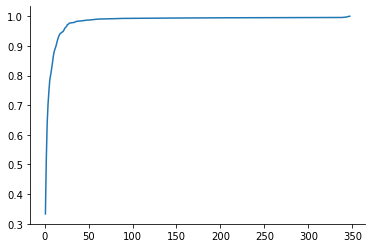

In [10]:
plt.plot(occMooveo.occurence,occMooveo.Prop_totale)
sns.despine()

In [11]:
newSkills = pd.read_csv("BDD/dict2.csv", encoding = "utf-8")
newSkills

occNewSkills = newSkills.groupby('occurence').skill.count().reset_index()

occNewSkills['prop'] = occNewSkills.skill / occNewSkills.skill.sum()

occNewSkills['Prop_totale'] = occNewSkills.prop.cumsum()
occNewSkills

occurence  skill      prop  Prop_totale
0           1    630  0.380435     0.380435
1           2    236  0.142512     0.522947
2           3    162  0.097826     0.620773
3           4    147  0.088768     0.709541
4           5     69  0.041667     0.751208
5           6     72  0.043478     0.794686
6           7     39  0.023551     0.818237
7           8     29  0.017512     0.835749
8           9     13  0.007850     0.843599
9          10     23  0.013889     0.857488
10         11     58  0.035024     0.892512
11         12     15  0.009058     0.901570
12         13     13  0.007850     0.909420
13         14      9  0.005435     0.914855
14         15     23  0.013889     0.928744
15         16     10  0.006039     0.934783
16         17      4  0.002415     0.937198
17         18     14  0.008454     0.945652
18         19     12  0.007246     0.952899
19         20      8  0.004831     0.957729
20         21      4  0.002415     0.960145
21         22      2  0.001208     0.961353
22         23      8  0.004831     0.966184
23         24      5  0.003019     0.969203
24         25      5  0.003019     0.972222
25         27      2  0.001208     0.973430
26         28      1  0.000604     0.974034
27         29      1  0.000604     0.974638
28         30      2  0.001208     0.975845
29         31      2  0.001208     0.977053
30         32      1  0.000604     0.977657
31         33      1  0.000604     0.978261
32         34      1  0.000604     0.978865
33         35      3  0.001812     0.980676
34         36      2  0.001208     0.981884
35         37      3  0.001812     0.983696
36         38      1  0.000604     0.984300
37         39      1  0.000604     0.984903
38         40      1  0.000604     0.985507
39         41      3  0.001812     0.987319
40         43      1  0.000604     0.987923
41         44      2  0.001208     0.989130
42         45      1  0.000604     0.989734
43         48      1  0.000604     0.990338
44         51      1  0.000604     0.990942
45         52      1  0.000604     0.991546
46         55      1  0.000604     0.992150
47         56      1  0.000604     0.992754
48         61      1  0.000604     0.993357
49         62      1  0.000604     0.993961
50         63      1  0.000604     0.994565
51         65      1  0.000604     0.995169
52         71      2  0.001208     0.996377
53         79      1  0.000604     0.996981
54         82      1  0.000604     0.997585
55         91      1  0.000604     0.998188
56        102      1  0.000604     0.998792
57        106      1  0.000604     0.999396
58        109      1  0.000604     1.000000

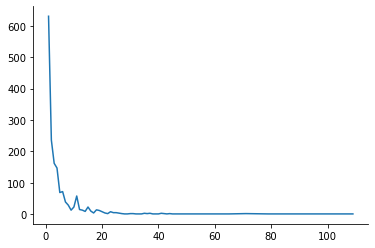

In [12]:
plt.plot(occNewSkills.occurence,occNewSkills.skill)
sns.despine()

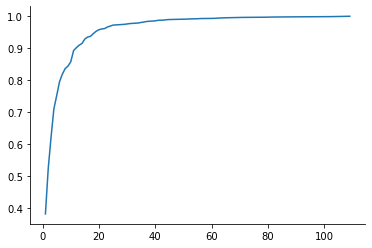

In [13]:
plt.plot(occNewSkills.occurence,occNewSkills.Prop_totale)
plt.plot()
sns.despine()

L'occurence des skills dans les jobs ne permettent pas de comparer les deux BDD.


## Étudions les distances entre chaque skill ! 

Pour ce faire, nous allons réutiliser la matrice de distance et faire la moyenne de ces distances pour chaque skill.

#### Mooveo

In [14]:
liste = distanceMatrix.columns
liste = liste[1:]

listeDistanceM = distanceMatrix[liste].sum(axis=1) / (len(distanceMatrix.index)-1)
listeDistanceM.describe()

count    960.000000
mean       0.989895
std        0.004564
min        0.966484
25%        0.987606
50%        0.990704
75%        0.992807
max        0.999061
dtype: float64

#### New skills

In [15]:
liste = newDist.columns
liste = liste[1:]

listeDitanceN = newDist[liste].sum(axis=1) / (len(newDist.index)-1)
listeDitanceN.describe()



count    1657.000000
mean        0.952040
std         0.024222
min         0.894347
25%         0.938086
50%         0.954261
75%         0.970285
max         0.998697
dtype: float64

On peut voir que le second dataset a des distances plus faibles entre chaque skills. Cela s'explique par une redondance de groupe de skill dans les jobs et donc une meilleure construction des jobs et leurs skills.

Ne sachant pas à quel point la différence est importante et pour valider notre hypothèse, nous allons aussi étudier une **matrice d'occurence entre chaque skill.**

In [16]:
occBtwSkillsM = pd.read_csv('BDD/OccSkillsAllMooveo2.csv', encoding = 'UTF8')

occBtwSkillsM = occBtwSkillsM.rename({'Unnamed: 0' : 'Skills'}, axis = 1)
occBtwSkillsM.set_index('Skills', inplace = True)

occBtwSkillsM

Microsoft  Sauvegarde  Virtualisation  UNIX  \
Skills                                                                       
Microsoft                              0          10              10    10   
Sauvegarde                            10           0              10    10   
Virtualisation                        10          10               0    10   
UNIX                                  10          10              10     0   
OpenVPN                               10          10              10    10   
...                                  ...         ...             ...   ...   
Mises à jour du logiciel               0           0               0     0   
Modélisation 3D                        0           0               0     0   
Optimisation opérationnelle            0           0               0     0   
Organisations d'apprentissage          0           0               0     0   
Design de produit                      0           0               0     0   

                               OpenVPN  Maintenance des systèmes  \
Skills                                                             
Microsoft                           10                        10   
Sauvegarde                          10                        10   
Virtualisation                      10                        10   
UNIX                                10                        10   
OpenVPN                              0                        10   
...                                ...                       ...   
Mises à jour du logiciel             0                         0   
Modélisation 3D                      0                         0   
Optimisation opérationnelle          0                         0   
Organisations d'apprentissage        0                         0   
Design de produit                    0                         0   

                               Gestion des applications  Antivirus  Anti-Spam  \
Skills                                                                          
Microsoft                                            10         10         10   
Sauvegarde                                           10         10         10   
Virtualisation                                       10         10         10   
UNIX                                                 10         10         10   
OpenVPN                                              10         10         10   
...                                                 ...        ...        ...   
Mises à jour du logiciel                              0          0          0   
Modélisation 3D                                       0          0          0   
Optimisation opérationnelle                           0          0          0   
Organisations d'apprentissage                         0          0          0   
Design de produit                                     0          0          0   

                               Assistance aux utilisateurs  ...  \
Skills                                                      ...   
Microsoft                                               10  ...   
Sauvegarde                                              10  ...   
Virtualisation                                          10  ...   
UNIX                                                    10  ...   
OpenVPN                                                 10  ...   
...                                                    ...  ...   
Mises à jour du logiciel                                 0  ...   
Modélisation 3D                                          0  ...   
Optimisation opérationnelle                              0  ...   
Organisations d'apprentissage                            0  ...   
Design de produit                                        0  ...   

                               Out-of-the-box Thinking  Analyse commerciale  \
Skills                                                                        
Microsoft                                      

Ici, on peut voir que le skill **Microsoft** apparaît 10 fois avec **Sauvegarde**. 

Dans 10 différents Jobs, nous verront Miscrosoft et Sauvegarde ensemble.  
_La diagonale corrsepond à l'occurence d'un skills dans tous les jobs. Nous l'avons passé à 0 pour ne pas biaisé les prochains calculs._

In [17]:
liste = occBtwSkillsM.columns

listeOccBtwSkillsM = occBtwSkillsM[liste].sum(axis=1) / (len(occBtwSkillsM.index) -1)
listeOccBtwSkillsM.describe()

count    960.000000
mean       0.144052
std        0.529180
min        0.019812
25%        0.019812
50%        0.039625
75%        0.118874
max        6.874870
dtype: float64

In [18]:
occBtwSkillsP = pd.read_csv("BDD/OccSkillsAllNewSkills2.csv", encoding = 'UTF-8')

occBtwSkillsP = occBtwSkillsP.rename({'Unnamed: 0' : 'Skills'}, axis = 1)
occBtwSkillsP.set_index('Skills', inplace = True)

occBtwSkillsP

Droit immobilier  \
Skills                                                           
Droit immobilier                                             0   
Comptabilité des opérations de marché                        1   
Gestion de projet                                           13   
Contrats de maintenance                                      4   
Veille réglementaire                                         6   
...                                                        ...   
Techniques de micro filmage, de numérisation                 1   
Lecture publique                                             1   
Littérature jeunesse                                         1   
Types de supports de films                                   1   
Sciences religieuses et théologie                            1   

                                              Comptabilité des opérations de marché  \
Skills                                                                                
Droit immobilier                                                                  1   
Comptabilité des opérations de marché                                             0   
Gestion de projet                                                                 1   
Contrats de maintenance                                                           1   
Veille réglementaire                                                              1   
...                                                                             ...   
Techniques de micro filmage, de numérisation                                      0   
Lecture publique                                                                  0   
Littérature jeunesse                                                              0   
Types de supports de films                                                        0   
Sciences religieuses et théologie                                                 0   

                                              Gestion de projet  \
Skills                                                            
Droit immobilier                                             13   
Comptabilité des opérations de marché                         1   
Gestion de projet                                             0   
Contrats de maintenance                                       4   
Veille réglementaire                                         11   
...                                                         ...   
Techniques de micro filmage, de numérisation                  1   
Lecture publique                                              1   
Littérature jeunesse                                          1   
Types de supports de films                                    1   
Sciences religieuses et théologie                             1   

                                              Contrats de maintenance  \
Skills                                                                  
Droit immobilier                                                    4   
Comptabilité des opérations de marché                               1   
Gestion de projet                                                   4   
Contrats de maintenance                                             0   
Veille réglementaire                                                4   
...                                                               ...   
Techniques de micro filmage, de numérisation                        0   
Lecture publique                                                    0   
Littérature jeunesse                                                0   
Types de supports de films                                          0   
Sciences religieuses et théologie                                   0   

                                              Veille réglementaire  \
Skills                                                               
Droit immobilier                                                 6   
Comptabilité des opérat

In [19]:
liste = occBtwSkillsP.columns

listeOccBtwSkillsP = occBtwSkillsP[liste].sum(axis=1) / (len(occBtwSkillsP.index)-1)
listeOccBtwSkillsP.describe()

count    1657.000000
mean        0.309080
std         0.441079
min         0.006643
25%         0.073671
50%         0.163647
75%         0.329106
max         4.239130
dtype: float64

On voit donc que sur la base de données scrapped à partir de Pôle Emploi, les skills vont apparaître en moyenne deux fois plus avec d'autres skills que sur la BDD de Mooveo. 

La BDD est donc plus hétérogène, plus diversifiée et est donc plus propice à du clustering. 

**De plus**, la BDD PE contient des skills n'apparaissant qu'une fois, car non pertinent (exemple : Sciences religieuses et théologie, qui devait être lié à un job contenant de nombreuses fiches métiers.). 

En nettoyant ce dataset, nous pourrions obtenir de bons résultats. 

In [20]:
newSkills

skill  occurence
0                                 Droit immobilier         16
1            Comptabilité des opérations de marché          4
2                                Gestion de projet        102
3                          Contrats de maintenance          4
4                             Veille réglementaire         23
...                                            ...        ...
1652  Techniques de micro filmage/ de numérisation          1
1653                              Lecture publique          1
1654                          Littérature jeunesse          1
1655                    Types de supports de films          1
1656             Sciences religieuses et théologie          1

[1657 rows x 2 columns]